# About the Dataset

https://www.kaggle.com/nypl/whats-on-the-menu

In [210]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [100]:
menu_df = pd.read_csv("Menu.csv")

mpage_df = pd.read_csv("MenuPage.csv")

mitem_df = pd.read_csv("MenuItem.csv")

dish_df = pd.read_csv('Dish.csv')


In [166]:
menu_df.head()

,id,name,sponsor,event,venue,place,physical_description,occasion,notes,call_number,keywords,language,date,location,location_type,currency,currency_symbol,status,page_count,dish_count
0,12463,NaN,HOTEL EASTMAN,BREAKFAST,COMMERCIAL,"HOT SPRINGS, AR",CARD; 4.75X7.5;,EASTER;,NaN,1900-2822,NaN,NaN,1900-04-15,Hotel Eastman,NaN,NaN,NaN,complete,2,67
1,12464,NaN,REPUBLICAN HOUSE,[DINNER],COMMERCIAL,"MILWAUKEE, [WI];",CARD; ILLUS; COL; 7.0X9.0;,EASTER;,WEDGEWOOD BLUE CARD; WHITE EMBOSSED GREEK KEY ...,1900-2825,NaN,NaN,1900-04-15,Republican House,NaN,NaN,NaN,complete,2,34
2,12465,NaN,NORDDEUTSCHER LLOYD BREMEN,FRUHSTUCK/BREAKFAST;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,CARD; ILLU; COL; 5.5X8.0;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, STEAMSHIP A...",1900-2827,NaN,NaN,1900-04-16,Norddeutscher Lloyd Bremen,NaN,NaN,NaN,complete,2,84
3,12466,NaN,NORDDEUTSCHER LLOYD BREMEN,LUNCH;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,CARD; ILLU; COL; 5.5X8.0;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, HARBOR SCEN...",1900-2828,NaN,NaN,1900-04-16,Norddeutscher Lloyd Bremen,NaN,NaN,NaN,complete,2,63
4,12467,NaN,NORDDEUTSCHER LLOYD BREMEN,DINNER;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,FOLDER; ILLU; COL; 5.5X7.5;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, HARBOR SCEN...",1900-2829,NaN,NaN,1900-04-16,Norddeutscher Lloyd Bremen,NaN,NaN,NaN,complete,4,33


In [167]:
mpage_df.head()

,id,menu_id,page_number,image_id,full_height,full_width,uuid
0,119,12460,1.0,1603595,7230.0,5428.0,510d47e4-2955-a3d9-e040-e00a18064a99
1,120,12460,2.0,1603596,5428.0,7230.0,510d47e4-2956-a3d9-e040-e00a18064a99
2,121,12460,3.0,1603597,7230.0,5428.0,510d47e4-2957-a3d9-e040-e00a18064a99
3,122,12460,4.0,1603598,7230.0,5428.0,510d47e4-2958-a3d9-e040-e00a18064a99
4,123,12461,1.0,1603591,7230.0,5428.0,510d47e4-2959-a3d9-e040-e00a18064a99


In [169]:
mitem_df.head()

,id,menu_page_id,price,high_price,dish_id,created_at,updated_at,xpos,ypos
0,1,1389,0.4,NaN,1.0,2011-03-28 15:00:44 UTC,2011-04-19 04:33:15 UTC,0.111429,0.254735
1,2,1389,0.6,NaN,2.0,2011-03-28 15:01:13 UTC,2011-04-19 15:00:54 UTC,0.438571,0.254735
2,3,1389,0.4,NaN,3.0,2011-03-28 15:01:40 UTC,2011-04-19 19:10:05 UTC,0.140000,0.261922
3,4,1389,0.5,NaN,4.0,2011-03-28 15:01:51 UTC,2011-04-19 19:07:01 UTC,0.377143,0.262720
4,5,3079,0.5,1.0,5.0,2011-03-28 15:21:26 UTC,2011-04-13 15:25:27 UTC,0.105714,0.313178


In [170]:
mitem_df.price.describe()

count    886524.000000
mean         12.836513
std         499.620387
min           0.000000
25%           0.250000
50%           0.400000
75%           1.000000
max      180000.000000
Name: price, dtype: float64

### Number of dishes on the menu over time

In [101]:
menu_df_sub = menu_df.dropna(subset=['date'])

In [102]:
value=str(float(len(menu_df_sub.date))/len(menu_df.date))
print("Proportion of non-missing dates: {0}".format(value))

Proportion of non-missing dates: 0.966600170989


In [103]:
print("Minimum date: {0}".format(str(min(menu_df_sub.date))))
print("Maximum date: {0}".format(str(max(menu_df_sub.date))))

Minimum date: 0001-01-01
Maximum date: 2928-03-26


In [104]:
menu_df_sub2 = menu_df_sub[menu_df_sub.date.between('1840-01-01','2016-11-30')]

In [105]:
value=str(float(len(menu_df_sub2.date))/len(menu_df_sub.date))
print("Proportion of subset with 'reasonable' dates: {0}".format(value))

Proportion of subset with 'reasonable' dates: 0.999705171295


In [115]:
menu_df_sub2.date = pd.to_datetime(menu_df_sub2.date)
menu_df_sub2.year=menu_df_sub2.date.dt.year

In [157]:
menu_df_sub2[['date','year']].tail()

,date,year
17540,1913-09-24,1913
17541,1913-09-24,1913
17542,1913-09-24,1913
17543,1913-09-24,1913
17544,1920-12-25,1920


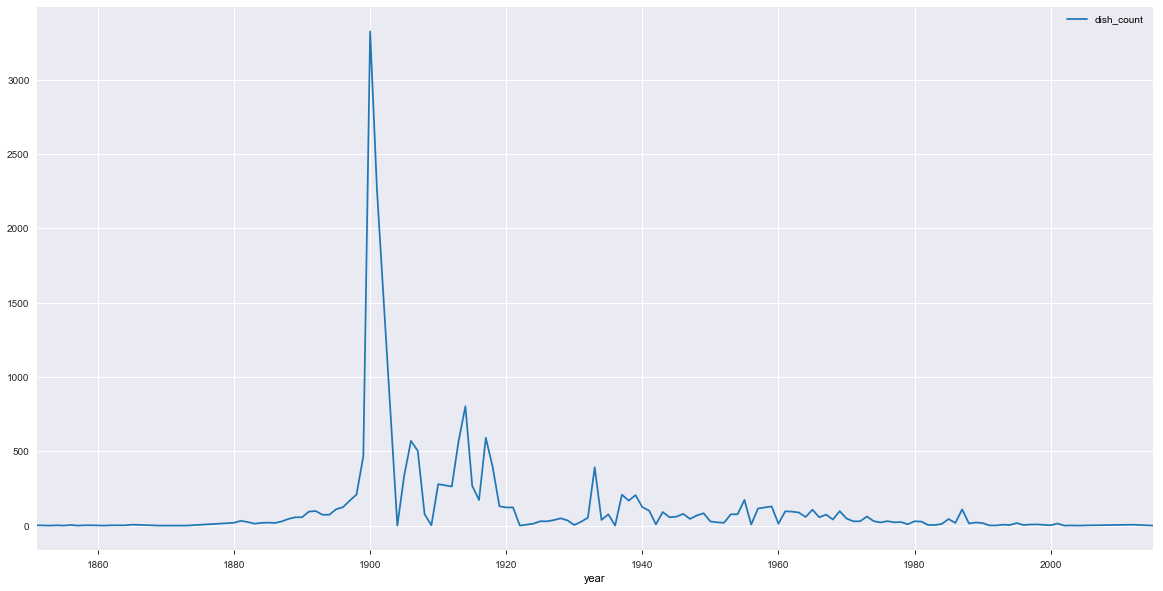

In [158]:
menu_df_sub2[['year', 'dish_count']].groupby(['year'], as_index=False).agg(len).plot(x='year', y='dish_count')

In [159]:
menu_df_sub2.decade=(menu_df_sub2.year//10)*10
menu_df_sub2[['date','year','decade']].tail()

,date,year,decade
17540,1913-09-24,1913,1910
17541,1913-09-24,1913,1910
17542,1913-09-24,1913,1910
17543,1913-09-24,1913,1910
17544,1920-12-25,1920,1920


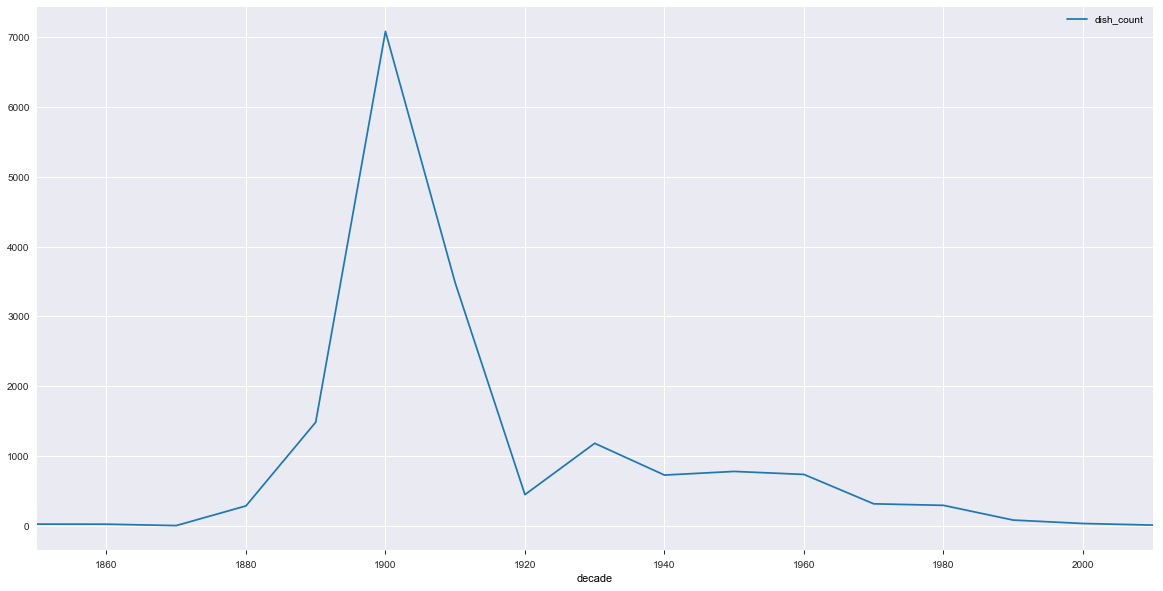

In [160]:
menu_df_sub2[['decade', 'dish_count']].groupby(['decade'], as_index=False).agg(len).plot(x='decade', y='dish_count')

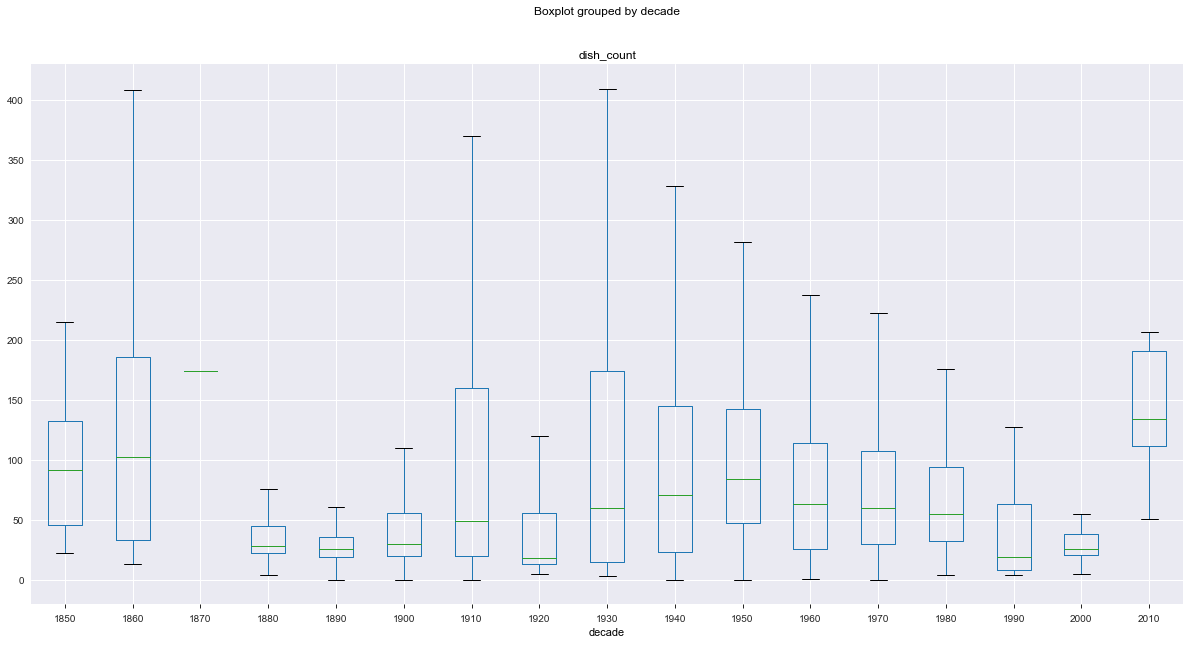

In [165]:
menu_df_sub2.boxplot(column='dish_count', by='decade', showfliers=0)

### Average price over time

In [171]:
mitem_df.price.describe()

count    886524.000000
mean         12.836513
std         499.620387
min           0.000000
25%           0.250000
50%           0.400000
75%           1.000000
max      180000.000000
Name: price, dtype: float64

In [183]:
mmerge_df = pd.merge(pd.merge(mitem_df,mpage_df,left_on='menu_page_id',right_on='id'),\
                     menu_df_sub2,left_on='menu_id',right_on='id' )

In [184]:
mmerge_df.columns

Index([u'id_x', u'menu_page_id', u'price', u'high_price', u'dish_id',
       u'created_at', u'updated_at', u'xpos', u'ypos', u'id_y', u'menu_id',
       u'page_number', u'image_id', u'full_height', u'full_width', u'uuid',
       u'id', u'name', u'sponsor', u'event', u'venue', u'place',
       u'physical_description', u'occasion', u'notes', u'call_number',
       u'keywords', u'language', u'date', u'location', u'location_type',
       u'currency', u'currency_symbol', u'status', u'page_count',
       u'dish_count', u'year', u'decade'],
      dtype='object')

In [190]:
mmerge_sub = mmerge_df[[u'date',u'menu_id', u'price']]
mmerge_sub.date = pd.to_datetime(mmerge_sub.date)
mmerge_sub.loc[:,'year'] = mmerge_sub.date.dt.year
mmerge_sub.loc[:,'decade'] = (mmerge_sub.year//10)*10
mmerge_sub.head()

,date,menu_id,price,year,decade
0,1900-04-09,12882,0.4,1900,1900
1,1900-04-09,12882,0.6,1900,1900
2,1900-04-09,12882,0.4,1900,1900
3,1900-04-09,12882,0.5,1900,1900
4,1900-04-09,12882,0.1,1900,1900


In [199]:
print mmerge_sub.shape
mmerge_sub2 = mmerge_sub.dropna()
print mmerge_sub2.shape

(1271684, 5)
(837558, 5)


In [202]:
mmerge_agg = mmerge_sub2[[u'menu_id', u'price', 'year', 'decade']].groupby(['menu_id','year', 'decade'], as_index=False).mean()
mmerge_agg.head()

,menu_id,year,decade,price
0,12469,1900,1900,1.079371
1,12474,1900,1900,2.530556
2,12475,1900,1900,0.663143
3,12483,1900,1900,0.317188
4,12504,1900,1900,0.431268


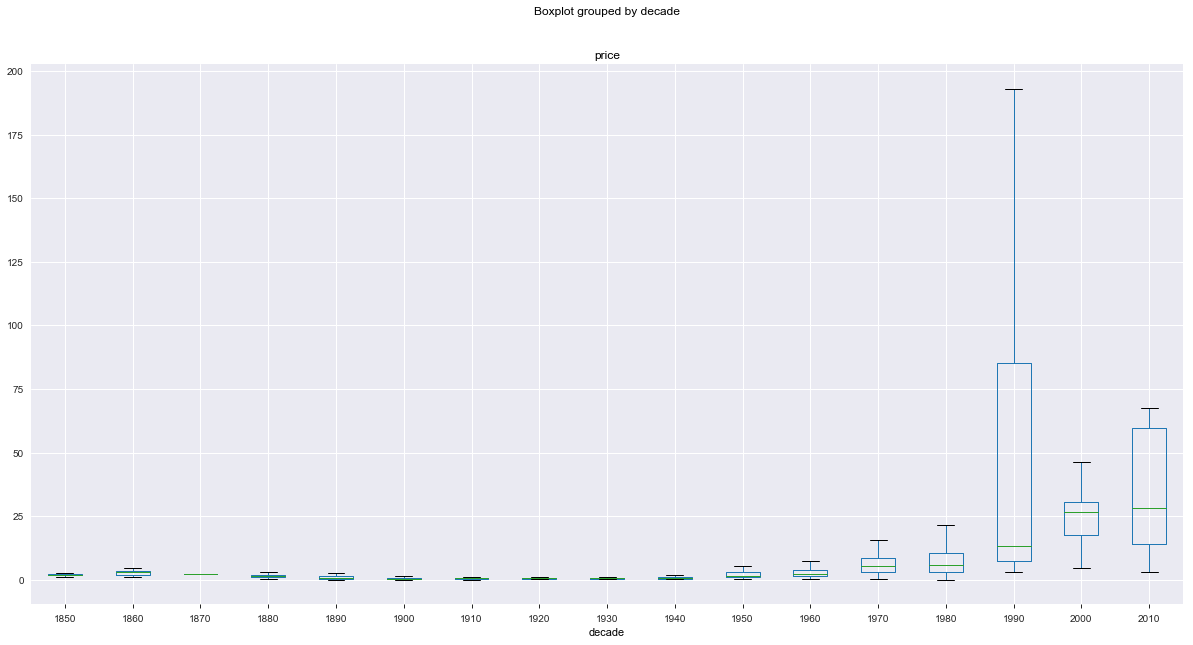

In [203]:
mmerge_agg.boxplot(column='price', by='decade', showfliers=0)